In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
from path import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load data CSV
file_path = Path('Resources/merged.csv')
data_df = pd.read_csv(file_path, encoding="utf-8-sig")
data_df.head()

,ID,entidad,tipo,link,precio,municipio_x,colonia,m2Terreno,m2Construccion,estacionamientos,...,antiguedad,id,nombre,municipio_y,asentamiento,codigo_postal,latitud,longitud,nombreMun,estado
0,1425548080,Aguascalientes,casas,https://casa.metroscubicos.com/MLM-1425548080-...,6500000.0,Aguascalientes,Los Pocitos,320.0,200.0,2.0,...,2.0,1001563.0,Los Pocitos,1001.0,Ejido,20328.0,21.923098,-102.343269,Aguascalientes,Aguascalientes
1,1397663987,Aguascalientes,casas,https://casa.metroscubicos.com/MLM-1397663987-...,1990000.0,Aguascalientes,Puesta del Sol,119.0,112.0,2.0,...,0.0,1001553.0,Puesta del Sol,1001.0,Fraccionamiento,20326.0,21.877844,-102.332252,Aguascalientes,Aguascalientes
2,1398422703,Aguascalientes,casas,https://casa.metroscubicos.com/MLM-1398422703-...,2750000.0,Aguascalientes,La Cantera,178.0,163.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1413775652,Aguascalientes,casas,https://casa.metroscubicos.com/MLM-1413775652-...,3000000.0,Aguascalientes,Ejido El Refugio de Peñuelas,640.0,150.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1411133552,Aguascalientes,casas,https://casa.metroscubicos.com/MLM-1411133552-...,1280000.0,Aguascalientes,Real De Haciendas,75.0,135.0,1.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                124176 non-null  int64  
 1   entidad           124176 non-null  object 
 2   tipo              124176 non-null  object 
 3   link              124176 non-null  object 
 4   precio            124176 non-null  float64
 5   municipio_x       124176 non-null  object 
 6   colonia           124176 non-null  object 
 7   m2Terreno         116698 non-null  float64
 8   m2Construccion    77064 non-null   float64
 9   estacionamientos  53889 non-null   float64
 10  mantenimiento     19815 non-null   float64
 11  Recamaras         79177 non-null   float64
 12  symbol            124176 non-null  object 
 13  Banos             80071 non-null   float64
 14  antiguedad        61115 non-null   float64
 15  id                43918 non-null   float64
 16  nombre            43

In [4]:
data_df = data_df.drop(['ID', 'link', 'colonia', 'mantenimiento', 'symbol', 'id', 'nombre', 'municipio_y', 'asentamiento', 'codigo_postal', 'nombre', 'nombreMun', 'estado'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   municipio_x       124176 non-null  object 
 4   m2Terreno         116698 non-null  float64
 5   m2Construccion    77064 non-null   float64
 6   estacionamientos  53889 non-null   float64
 7   Recamaras         79177 non-null   float64
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  latitud           43918 non-null   float64
 11  longitud          43918 non-null   float64
dtypes: float64(9), object(3)
memory usage: 11.4+ MB


In [5]:
casas_df = data_df.loc[(data_df['tipo'] == 'casas')]
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120278 entries, 0 to 124175
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120278 non-null  object 
 1   tipo              120278 non-null  object 
 2   precio            120278 non-null  float64
 3   municipio_x       120278 non-null  object 
 4   m2Terreno         112912 non-null  float64
 5   m2Construccion    75241 non-null   float64
 6   estacionamientos  52779 non-null   float64
 7   Recamaras         77437 non-null   float64
 8   Banos             78264 non-null   float64
 9   antiguedad        60111 non-null   float64
 10  latitud           42502 non-null   float64
 11  longitud          42502 non-null   float64
dtypes: float64(9), object(3)
memory usage: 11.9+ MB


In [6]:
casas_df = casas_df.drop(['tipo'], axis=1)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120278 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120278 non-null  object 
 1   precio            120278 non-null  float64
 2   municipio_x       120278 non-null  object 
 3   m2Terreno         112912 non-null  float64
 4   m2Construccion    75241 non-null   float64
 5   estacionamientos  52779 non-null   float64
 6   Recamaras         77437 non-null   float64
 7   Banos             78264 non-null   float64
 8   antiguedad        60111 non-null   float64
 9   latitud           42502 non-null   float64
 10  longitud          42502 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [7]:
casas_df.estacionamientos.value_counts()

 2.0      25996
 1.0      14396
 3.0       5489
 4.0       3663
 6.0       1081
 5.0        862
 8.0        356
 10.0       337
 7.0        192
 12.0        82
 15.0        81
 9.0         60
 20.0        37
 13.0        17
 50.0        15
 11.0        12
 30.0        12
 16.0        11
 18.0        10
 14.0         9
 734.0        7
 40.0         7
 95.0         4
 17.0         3
 33.0         3
 100.0        3
 22.0         2
 25.0         2
 0.0          2
 60.0         2
 72.0         2
 35.0         2
 126.0        1
 24.0         1
 150.0        1
 48.0         1
 64.0         1
 32.0         1
 140.0        1
 250.0        1
 27.0         1
 70.0         1
 45.0         1
 55.0         1
 110.0        1
 146.0        1
-5.0          1
 28.0         1
-2.0          1
 410.0        1
 80.0         1
 19.0         1
 43.0         1
 200.0        1
Name: estacionamientos, dtype: int64

In [8]:
casas_df.drop(casas_df[casas_df['estacionamientos'] >= 80].index, inplace=True)
casas_df.drop(casas_df[casas_df['estacionamientos'] < 0].index, inplace=True)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120253 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120253 non-null  object 
 1   precio            120253 non-null  float64
 2   municipio_x       120253 non-null  object 
 3   m2Terreno         112887 non-null  float64
 4   m2Construccion    75216 non-null   float64
 5   estacionamientos  52754 non-null   float64
 6   Recamaras         77417 non-null   float64
 7   Banos             78247 non-null   float64
 8   antiguedad        60087 non-null   float64
 9   latitud           42490 non-null   float64
 10  longitud          42490 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [9]:
casas_df.Recamaras.value_counts()

3.0        37237
2.0        19460
4.0        12254
1.0         3549
5.0         2883
6.0          994
7.0          375
8.0          248
9.0          111
10.0          87
11.0          50
12.0          39
15.0          19
14.0          18
20.0          10
13.0          10
21.0           8
18.0           8
26.0           6
24.0           5
16.0           5
17.0           4
30.0           4
33.0           3
34.0           3
38.0           3
27.0           3
512.0          2
32.0           2
28.0           2
55.0           1
51.0           1
46.0           1
49.0           1
74.0           1
300.0          1
39.0           1
64.0           1
152.0          1
90.0           1
110.0          1
21111.0        1
37.0           1
23.0           1
22.0           1
Name: Recamaras, dtype: int64

In [10]:
casas_df.drop(casas_df[casas_df['Recamaras'] >= 30].index, inplace=True)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120223 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120223 non-null  object 
 1   precio            120223 non-null  float64
 2   municipio_x       120223 non-null  object 
 3   m2Terreno         112860 non-null  float64
 4   m2Construccion    75187 non-null   float64
 5   estacionamientos  52740 non-null   float64
 6   Recamaras         77387 non-null   float64
 7   Banos             78219 non-null   float64
 8   antiguedad        60064 non-null   float64
 9   latitud           42478 non-null   float64
 10  longitud          42478 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [11]:
casas_df.Banos.value_counts()

2.0       28658
3.0       20685
1.0       11724
4.0       10645
5.0        3956
6.0        1426
7.0         567
8.0         236
9.0          93
10.0         73
11.0         42
12.0         24
15.0         14
14.0         11
35.0          8
13.0          8
20.0          8
18.0          7
16.0          4
22.0          4
25.0          4
17.0          3
28.0          3
27.0          3
24.0          3
23.0          2
21.0          2
3220.0        1
125.0         1
19.0          1
45.0          1
212.0         1
30.0          1
Name: Banos, dtype: int64

In [12]:
casas_df.drop(casas_df[casas_df['Banos'] >= 30].index, inplace=True)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120210 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120210 non-null  object 
 1   precio            120210 non-null  float64
 2   municipio_x       120210 non-null  object 
 3   m2Terreno         112849 non-null  float64
 4   m2Construccion    75175 non-null   float64
 5   estacionamientos  52730 non-null   float64
 6   Recamaras         77374 non-null   float64
 7   Banos             78206 non-null   float64
 8   antiguedad        60052 non-null   float64
 9   latitud           42474 non-null   float64
 10  longitud          42474 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [13]:
casas_df.antiguedad.value_counts()

0.0       36071
1.0        3296
12.0       1879
2.0        1760
10.0       1755
          ...  
2010.0        1
90.0          1
92.0          1
1994.0        1
250.0         1
Name: antiguedad, Length: 138, dtype: int64

In [14]:
casas_df = casas_df.replace({1994.0:28, 2010:12, 1982.0:40, 1981.0:41, 1962.0:60, 1971.0:51, 2020.0:2, 2021.0:1, 1985.0:37, 1996.0:26, 2014.0:8,
                            2009.0:13, 2012:10, 2000.0:22, 1992.0:30, 1987.0:35, 2022.0:0, 2001.0:21, 1997.0:25, 2013.0:9, 2019.0:3, 2007.0:15,
                            2005.0:17, 2017.0:5, 1990.0:32, 2004.0:18, 2002.0:20, 1972.0:50, 2018.0:4, 2016.0:6, 2015.0:7, 2006.0:16, 2008.0:14,
                            1984.0:38, 2011.0:11, 2023.0:0})
casas_df.antiguedad.value_counts()

0.0      36079
1.0       3307
12.0      1880
2.0       1818
10.0      1775
         ...  
202.0        1
483.0        1
90.0         1
92.0         1
250.0        1
Name: antiguedad, Length: 102, dtype: int64

In [15]:
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120210 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120210 non-null  object 
 1   precio            120210 non-null  float64
 2   municipio_x       120210 non-null  object 
 3   m2Terreno         112849 non-null  float64
 4   m2Construccion    75175 non-null   float64
 5   estacionamientos  52730 non-null   float64
 6   Recamaras         77374 non-null   float64
 7   Banos             78206 non-null   float64
 8   antiguedad        60052 non-null   float64
 9   latitud           42474 non-null   float64
 10  longitud          42474 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [16]:
casas_df['Banos'] = casas_df['Banos'].fillna(0)
casas_df['estacionamientos'] = casas_df['estacionamientos'].fillna(0)
casas_df['Recamaras'] = casas_df['Recamaras'].fillna(0)
casas_df['antiguedad'] = casas_df['antiguedad'].fillna(0)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120210 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120210 non-null  object 
 1   precio            120210 non-null  float64
 2   municipio_x       120210 non-null  object 
 3   m2Terreno         112849 non-null  float64
 4   m2Construccion    75175 non-null   float64
 5   estacionamientos  120210 non-null  float64
 6   Recamaras         120210 non-null  float64
 7   Banos             120210 non-null  float64
 8   antiguedad        120210 non-null  float64
 9   latitud           42474 non-null   float64
 10  longitud          42474 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [17]:
casas_df.m2Construccion.fillna(casas_df.m2Terreno, inplace=True)
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120210 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           120210 non-null  object 
 1   precio            120210 non-null  float64
 2   municipio_x       120210 non-null  object 
 3   m2Terreno         112849 non-null  float64
 4   m2Construccion    119819 non-null  float64
 5   estacionamientos  120210 non-null  float64
 6   Recamaras         120210 non-null  float64
 7   Banos             120210 non-null  float64
 8   antiguedad        120210 non-null  float64
 9   latitud           42474 non-null   float64
 10  longitud          42474 non-null   float64
dtypes: float64(9), object(2)
memory usage: 11.0+ MB


In [18]:
casas_df = casas_df.dropna()

In [19]:
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40193 entries, 0 to 124174
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           40193 non-null  object 
 1   precio            40193 non-null  float64
 2   municipio_x       40193 non-null  object 
 3   m2Terreno         40193 non-null  float64
 4   m2Construccion    40193 non-null  float64
 5   estacionamientos  40193 non-null  float64
 6   Recamaras         40193 non-null  float64
 7   Banos             40193 non-null  float64
 8   antiguedad        40193 non-null  float64
 9   latitud           40193 non-null  float64
 10  longitud          40193 non-null  float64
dtypes: float64(9), object(2)
memory usage: 3.7+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
# Use labelencoder to convert tipo into integers
casas_df['entidad'] = LabelEncoder().fit_transform(casas_df['entidad'])
casas_df['municipio_x'] = LabelEncoder().fit_transform(casas_df['municipio_x'])
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40193 entries, 0 to 124174
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           40193 non-null  int32  
 1   precio            40193 non-null  float64
 2   municipio_x       40193 non-null  int32  
 3   m2Terreno         40193 non-null  float64
 4   m2Construccion    40193 non-null  float64
 5   estacionamientos  40193 non-null  float64
 6   Recamaras         40193 non-null  float64
 7   Banos             40193 non-null  float64
 8   antiguedad        40193 non-null  float64
 9   latitud           40193 non-null  float64
 10  longitud          40193 non-null  float64
dtypes: float64(9), int32(2)
memory usage: 3.4 MB


In [21]:
corr_matrix = casas_df.corr()
corr_matrix['precio'].sort_values(ascending=False)

precio              1.000000
latitud             0.007251
longitud            0.004074
m2Terreno           0.002741
m2Construccion      0.002722
estacionamientos   -0.005788
entidad            -0.009209
antiguedad         -0.011154
municipio_x        -0.011803
Banos              -0.026397
Recamaras          -0.039356
Name: precio, dtype: float64

In [22]:
# Define target
y = casas_df['precio']
X = casas_df.drop(columns='precio')

In [23]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32154, 10)
(8039, 10)
(32154,)
(8039,)


In [26]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler instance
scaler = StandardScaler()
# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance
model = RandomForestClassifier(n_estimators=200, random_state=1)

# Fitting the model
model = model.fit(X_train_scaled, y_train)

MemoryError: could not allocate 947912704 bytes

In [ ]:
# Making predictions
predictions = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

In [6]:
data_df['entidad'].value_counts()

 Chiapas                            8072
 Veracruz de Ignacio de la Llave    6913
 Baja California                    6647
 Yucatán                            6156
 Nuevo León                         6127
 Quintana Roo                       6023
 Jalisco                            5990
 México                             5894
 Morelos                            5820
 Puebla                             5516
 San Luis Potosí                    5395
 Guanajuato                         5056
 Ciudad de México                   4835
 Durango                            4348
 Coahuila de Zaragoza               4125
 Querétaro                          4047
 Sinaloa                            3990
 Colima                             3775
 Guerrero                           3472
 Hidalgo                            3327
 Tamaulipas                         2923
 Michoacán de Ocampo                2688
 Aguascalientes                     2052
 Chihuahua                          1978
 Tabasco        

In [7]:
data_df['tipo'].value_counts()

casas            120278
terrenos           2005
departamentos      1893
Name: tipo, dtype: int64

In [8]:
data_df = data_df.drop(['municipio_x'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   colonia           124176 non-null  object 
 4   m2Terreno         116698 non-null  float64
 5   m2Construccion    77064 non-null   float64
 6   estacionamientos  53889 non-null   float64
 7   Recamaras         79177 non-null   float64
 8   symbol            124176 non-null  object 
 9   Banos             80071 non-null   float64
 10  antiguedad        61115 non-null   float64
 11  id                43918 non-null   float64
 12  nombre            43918 non-null   object 
 13  municipio_y       43918 non-null   float64
 14  asentamiento      43918 non-null   object 
 15  codigo_postal     43918 non-null   float64
 16  latitud           43

In [9]:
data_df = data_df.drop(['colonia'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         116698 non-null  float64
 4   m2Construccion    77064 non-null   float64
 5   estacionamientos  53889 non-null   float64
 6   Recamaras         79177 non-null   float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [10]:
# replace Nan in m2construccion with m2terreno
data_df.m2Construccion.fillna(data_df.m2Terreno, inplace=True)
data_df.m2Terreno.fillna(data_df.m2Construccion, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  53889 non-null   float64
 6   Recamaras         79177 non-null   float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [11]:
# Replace NaN with 0 recámaras
data_df["Recamaras"] = data_df["Recamaras"].fillna(0)
data_df['estacionamientos'] = data_df['estacionamientos'].fillna(0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [13]:
data_df['nombre'].value_counts()

San José                       1123
Emiliano Zapata                 851
San Isidro                      847
Benito Juárez                   652
Centro                          546
                               ... 
Las Américas San Pablo            1
Colinas de la Piedad              1
La Cañada Juriquilla              1
Centro Universitario U.A.Q.       1
La Encantada                      1
Name: nombre, Length: 3181, dtype: int64

In [14]:
data_df = data_df.drop(['nombre'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  municipio_y       43918 non-null   float64
 12  asentamiento      43918 non-null   object 
 13  codigo_postal     43918 non-null   float64
 14  latitud           43918 non-null   float64
 15  longitud          43918 non-null   float64
 16  nombreMun         43

In [15]:
data_df['asentamiento'].value_counts()

Colonia                  21647
Fraccionamiento           9049
Pueblo                    4072
Ranchería                 2882
Ejido                     1588
Barrio                    1534
Unidad habitacional        575
Residencial                564
Condominio                 455
Zona comercial             253
Poblado comunal            239
Conjunto habitacional      215
Rancho                     148
Parque industrial          121
Zona industrial            113
Congregación               106
Villa                       69
Hacienda                    54
Finca                       53
Zona federal                50
Equipamiento                35
Ampliación                  32
Puerto                      24
Club de golf                12
Gran usuario                10
Aeropuerto                   9
Granja                       5
Estación                     3
Paraje                       1
Name: asentamiento, dtype: int64

In [16]:
data_df = data_df.drop(['asentamiento'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  municipio_y       43918 non-null   float64
 12  codigo_postal     43918 non-null   float64
 13  latitud           43918 non-null   float64
 14  longitud          43918 non-null   float64
 15  nombreMun         43918 non-null   object 
 16  estado            43

In [17]:
data_df = data_df.drop(['id'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  municipio_y       43918 non-null   float64
 11  codigo_postal     43918 non-null   float64
 12  latitud           43918 non-null   float64
 13  longitud          43918 non-null   float64
 14  nombreMun         43918 non-null   object 
 15  estado            43918 non-null   object 
dtypes: float64(11), obje

In [18]:
data_df = data_df.drop(['symbol'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   Banos             80071 non-null   float64
 8   antiguedad        61115 non-null   float64
 9   municipio_y       43918 non-null   float64
 10  codigo_postal     43918 non-null   float64
 11  latitud           43918 non-null   float64
 12  longitud          43918 non-null   float64
 13  nombreMun         43918 non-null   object 
 14  estado            43918 non-null   object 
dtypes: float64(11), object(4)
memory usage: 14.2+ MB


In [19]:
data_df['nombreMun'].value_counts()

 San Luis Potosí    2739
 Mérida             1783
 Benito Juárez      1742
 Monterrey          1705
 Culiacán           1535
                    ... 
 Homún                 1
 El Porvenir           1
 Huajicori             1
 Cansahcab             1
 Luis Moya             1
Name: nombreMun, Length: 366, dtype: int64

In [20]:
data_df = data_df.drop(['nombreMun'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   Banos             80071 non-null   float64
 8   antiguedad        61115 non-null   float64
 9   municipio_y       43918 non-null   float64
 10  codigo_postal     43918 non-null   float64
 11  latitud           43918 non-null   float64
 12  longitud          43918 non-null   float64
 13  estado            43918 non-null   object 
dtypes: float64(11), object(3)
memory usage: 13.3+ MB


In [21]:
data_df = data_df.drop(['entidad'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              124176 non-null  object 
 1   precio            124176 non-null  float64
 2   m2Terreno         123770 non-null  float64
 3   m2Construccion    123770 non-null  float64
 4   estacionamientos  124176 non-null  float64
 5   Recamaras         124176 non-null  float64
 6   Banos             80071 non-null   float64
 7   antiguedad        61115 non-null   float64
 8   municipio_y       43918 non-null   float64
 9   codigo_postal     43918 non-null   float64
 10  latitud           43918 non-null   float64
 11  longitud          43918 non-null   float64
 12  estado            43918 non-null   object 
dtypes: float64(11), object(2)
memory usage: 12.3+ MB


In [22]:
data_df = data_df.drop(['codigo_postal'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              124176 non-null  object 
 1   precio            124176 non-null  float64
 2   m2Terreno         123770 non-null  float64
 3   m2Construccion    123770 non-null  float64
 4   estacionamientos  124176 non-null  float64
 5   Recamaras         124176 non-null  float64
 6   Banos             80071 non-null   float64
 7   antiguedad        61115 non-null   float64
 8   municipio_y       43918 non-null   float64
 9   latitud           43918 non-null   float64
 10  longitud          43918 non-null   float64
 11  estado            43918 non-null   object 
dtypes: float64(10), object(2)
memory usage: 11.4+ MB


In [23]:
data_df = data_df.drop(['m2Construccion'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              124176 non-null  object 
 1   precio            124176 non-null  float64
 2   m2Terreno         123770 non-null  float64
 3   estacionamientos  124176 non-null  float64
 4   Recamaras         124176 non-null  float64
 5   Banos             80071 non-null   float64
 6   antiguedad        61115 non-null   float64
 7   municipio_y       43918 non-null   float64
 8   latitud           43918 non-null   float64
 9   longitud          43918 non-null   float64
 10  estado            43918 non-null   object 
dtypes: float64(9), object(2)
memory usage: 10.4+ MB


In [24]:
data_df = data_df.drop(['municipio_y'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              124176 non-null  object 
 1   precio            124176 non-null  float64
 2   m2Terreno         123770 non-null  float64
 3   estacionamientos  124176 non-null  float64
 4   Recamaras         124176 non-null  float64
 5   Banos             80071 non-null   float64
 6   antiguedad        61115 non-null   float64
 7   latitud           43918 non-null   float64
 8   longitud          43918 non-null   float64
 9   estado            43918 non-null   object 
dtypes: float64(8), object(2)
memory usage: 9.5+ MB


In [25]:
data_df = data_df.dropna()

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20325 entries, 0 to 124031
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              20325 non-null  object 
 1   precio            20325 non-null  float64
 2   m2Terreno         20325 non-null  float64
 3   estacionamientos  20325 non-null  float64
 4   Recamaras         20325 non-null  float64
 5   Banos             20325 non-null  float64
 6   antiguedad        20325 non-null  float64
 7   latitud           20325 non-null  float64
 8   longitud          20325 non-null  float64
 9   estado            20325 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.7+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder
# Use labelencoder to convert tipo into integers
data_df['tipo'] = LabelEncoder().fit_transform(data_df['tipo'])
data_df['estado'] = LabelEncoder().fit_transform(data_df['estado'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20325 entries, 0 to 124031
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              20325 non-null  int32  
 1   precio            20325 non-null  float64
 2   m2Terreno         20325 non-null  float64
 3   estacionamientos  20325 non-null  float64
 4   Recamaras         20325 non-null  float64
 5   Banos             20325 non-null  float64
 6   antiguedad        20325 non-null  float64
 7   latitud           20325 non-null  float64
 8   longitud          20325 non-null  float64
 9   estado            20325 non-null  int32  
dtypes: float64(8), int32(2)
memory usage: 1.6 MB


In [28]:
data_df.describe()

,tipo,precio,m2Terreno,estacionamientos,Recamaras,Banos,antiguedad,latitud,longitud,estado
count,20325.000000,2.032500e+04,2.032500e+04,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000
mean,0.017319,5.930777e+06,4.369405e+03,1.437294,3.086298,2.767823,15.636408,21.864112,-99.461205,14.966150
std,0.130459,6.282417e+07,3.063677e+05,2.984736,5.517469,2.756800,145.979618,4.167180,7.299040,9.343946
min,0.000000,1.111000e+03,1.000000e+00,0.000000,0.000000,1.000000,0.000000,14.592167,-117.120048,0.000000
25%,0.000000,1.700000e+06,1.050000e+02,0.000000,2.000000,2.000000,0.000000,19.267313,-102.245232,5.000000
50%,0.000000,3.099999e+06,1.600000e+02,1.000000,3.000000,2.000000,0.000000,20.730190,-99.248970,17.000000
75%,0.000000,5.500000e+06,3.000000e+02,2.000000,3.000000,3.000000,6.000000,24.036745,-96.655243,22.000000
max,1.000000,7.461676e+09,3.821188e+07,235.000000,512.000000,212.000000,2023.000000,38.973278,-77.036278,30.000000


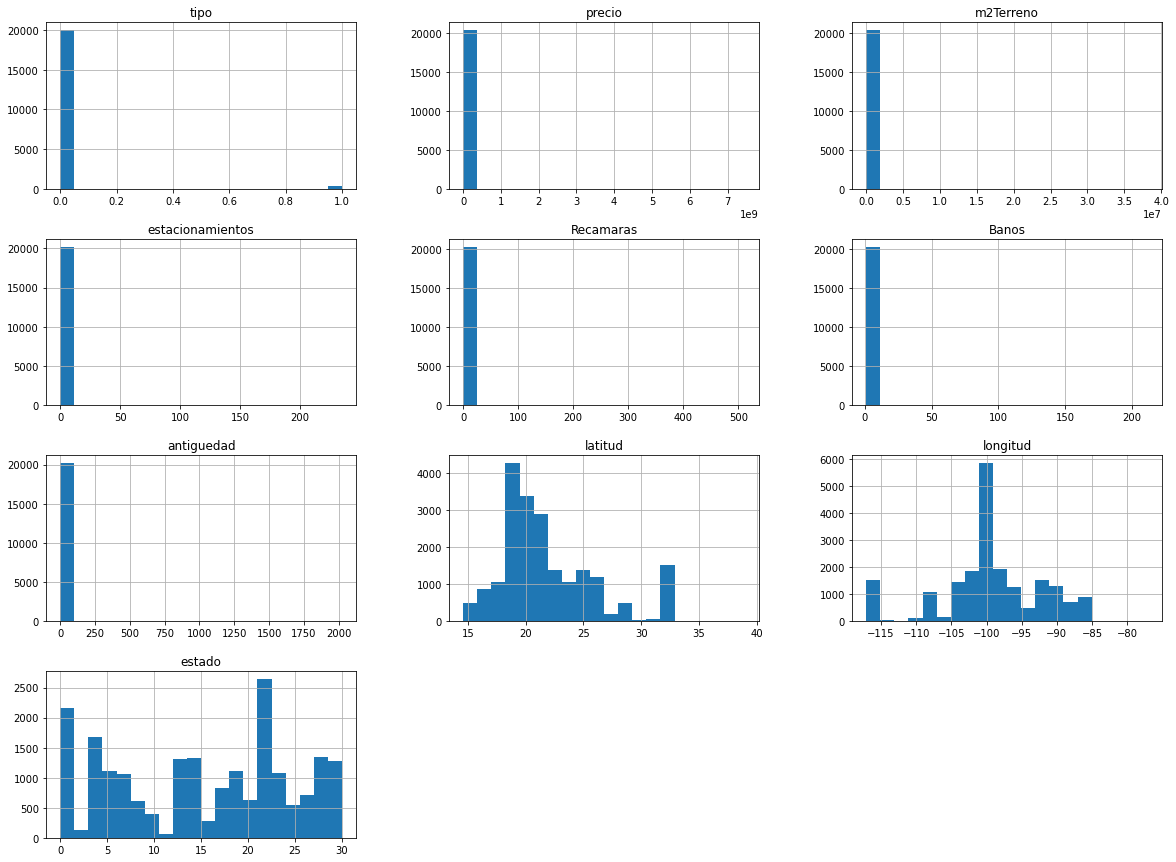

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
data_df.hist(bins=20, figsize=(20,15))
plt.show()

In [30]:
corr_matrix = data_df.corr()
corr_matrix['precio'].sort_values(ascending=False)

precio              1.000000
Banos               0.096878
estacionamientos    0.050003
Recamaras           0.041449
tipo                0.021042
longitud            0.007508
antiguedad          0.003896
m2Terreno           0.001197
latitud            -0.002810
estado             -0.006647
Name: precio, dtype: float64

In [31]:
# Define target
y = data_df['precio']
# Define features set
X = data_df.drop(columns='precio')

In [32]:
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=1)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16260, 9)
(4065, 9)
(16260,)
(4065,)


In [35]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler instance
scaler = StandardScaler()
# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance
model = RandomForestClassifier(n_estimators=20, random_state=1)

# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [37]:
# Making predictions
predictions = model.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.3549815498154982

In [39]:
 # Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.1836940192061215
Testing Score: -2.4066285088121786


In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=500,
                               random_state=1)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

KeyboardInterrupt: 